In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Clustering s1

In [2]:
chain = pd.read_csv('data/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
chain.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

In [3]:



# Sélectionner automatiquement les colonnes numériques pour le clustering
colonnes_numeriques = []

for colonne in chain.columns:
    try:
        # Essayer de convertir le premier élément en nombre
        pd.to_numeric(chain[colonne].iloc[0])
        if colonne not in ['Order Zipcode', 'Product Description']:
            colonnes_numeriques.append(colonne)
    except (ValueError, TypeError):
        # La conversion a échoué, la colonne ne contient probablement pas de valeurs numériques
        pass

# Sélectionner uniquement les colonnes numériques

colonnes_numeriques = [
 'Category Id',
 'Customer Id',
 'Department Id',
 'Order Customer Id',
 'Order Id',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Quantity',
 'Product Card Id',
 'Product Category Id']

In [7]:
data_pairplot = chain[colonnes_numeriques]
pair_hist_data =  [str(dept)+ ','+str(cat) for (dept, cat) in zip(data_pairplot['Department Id'], data_pairplot['Product Category Id'])]

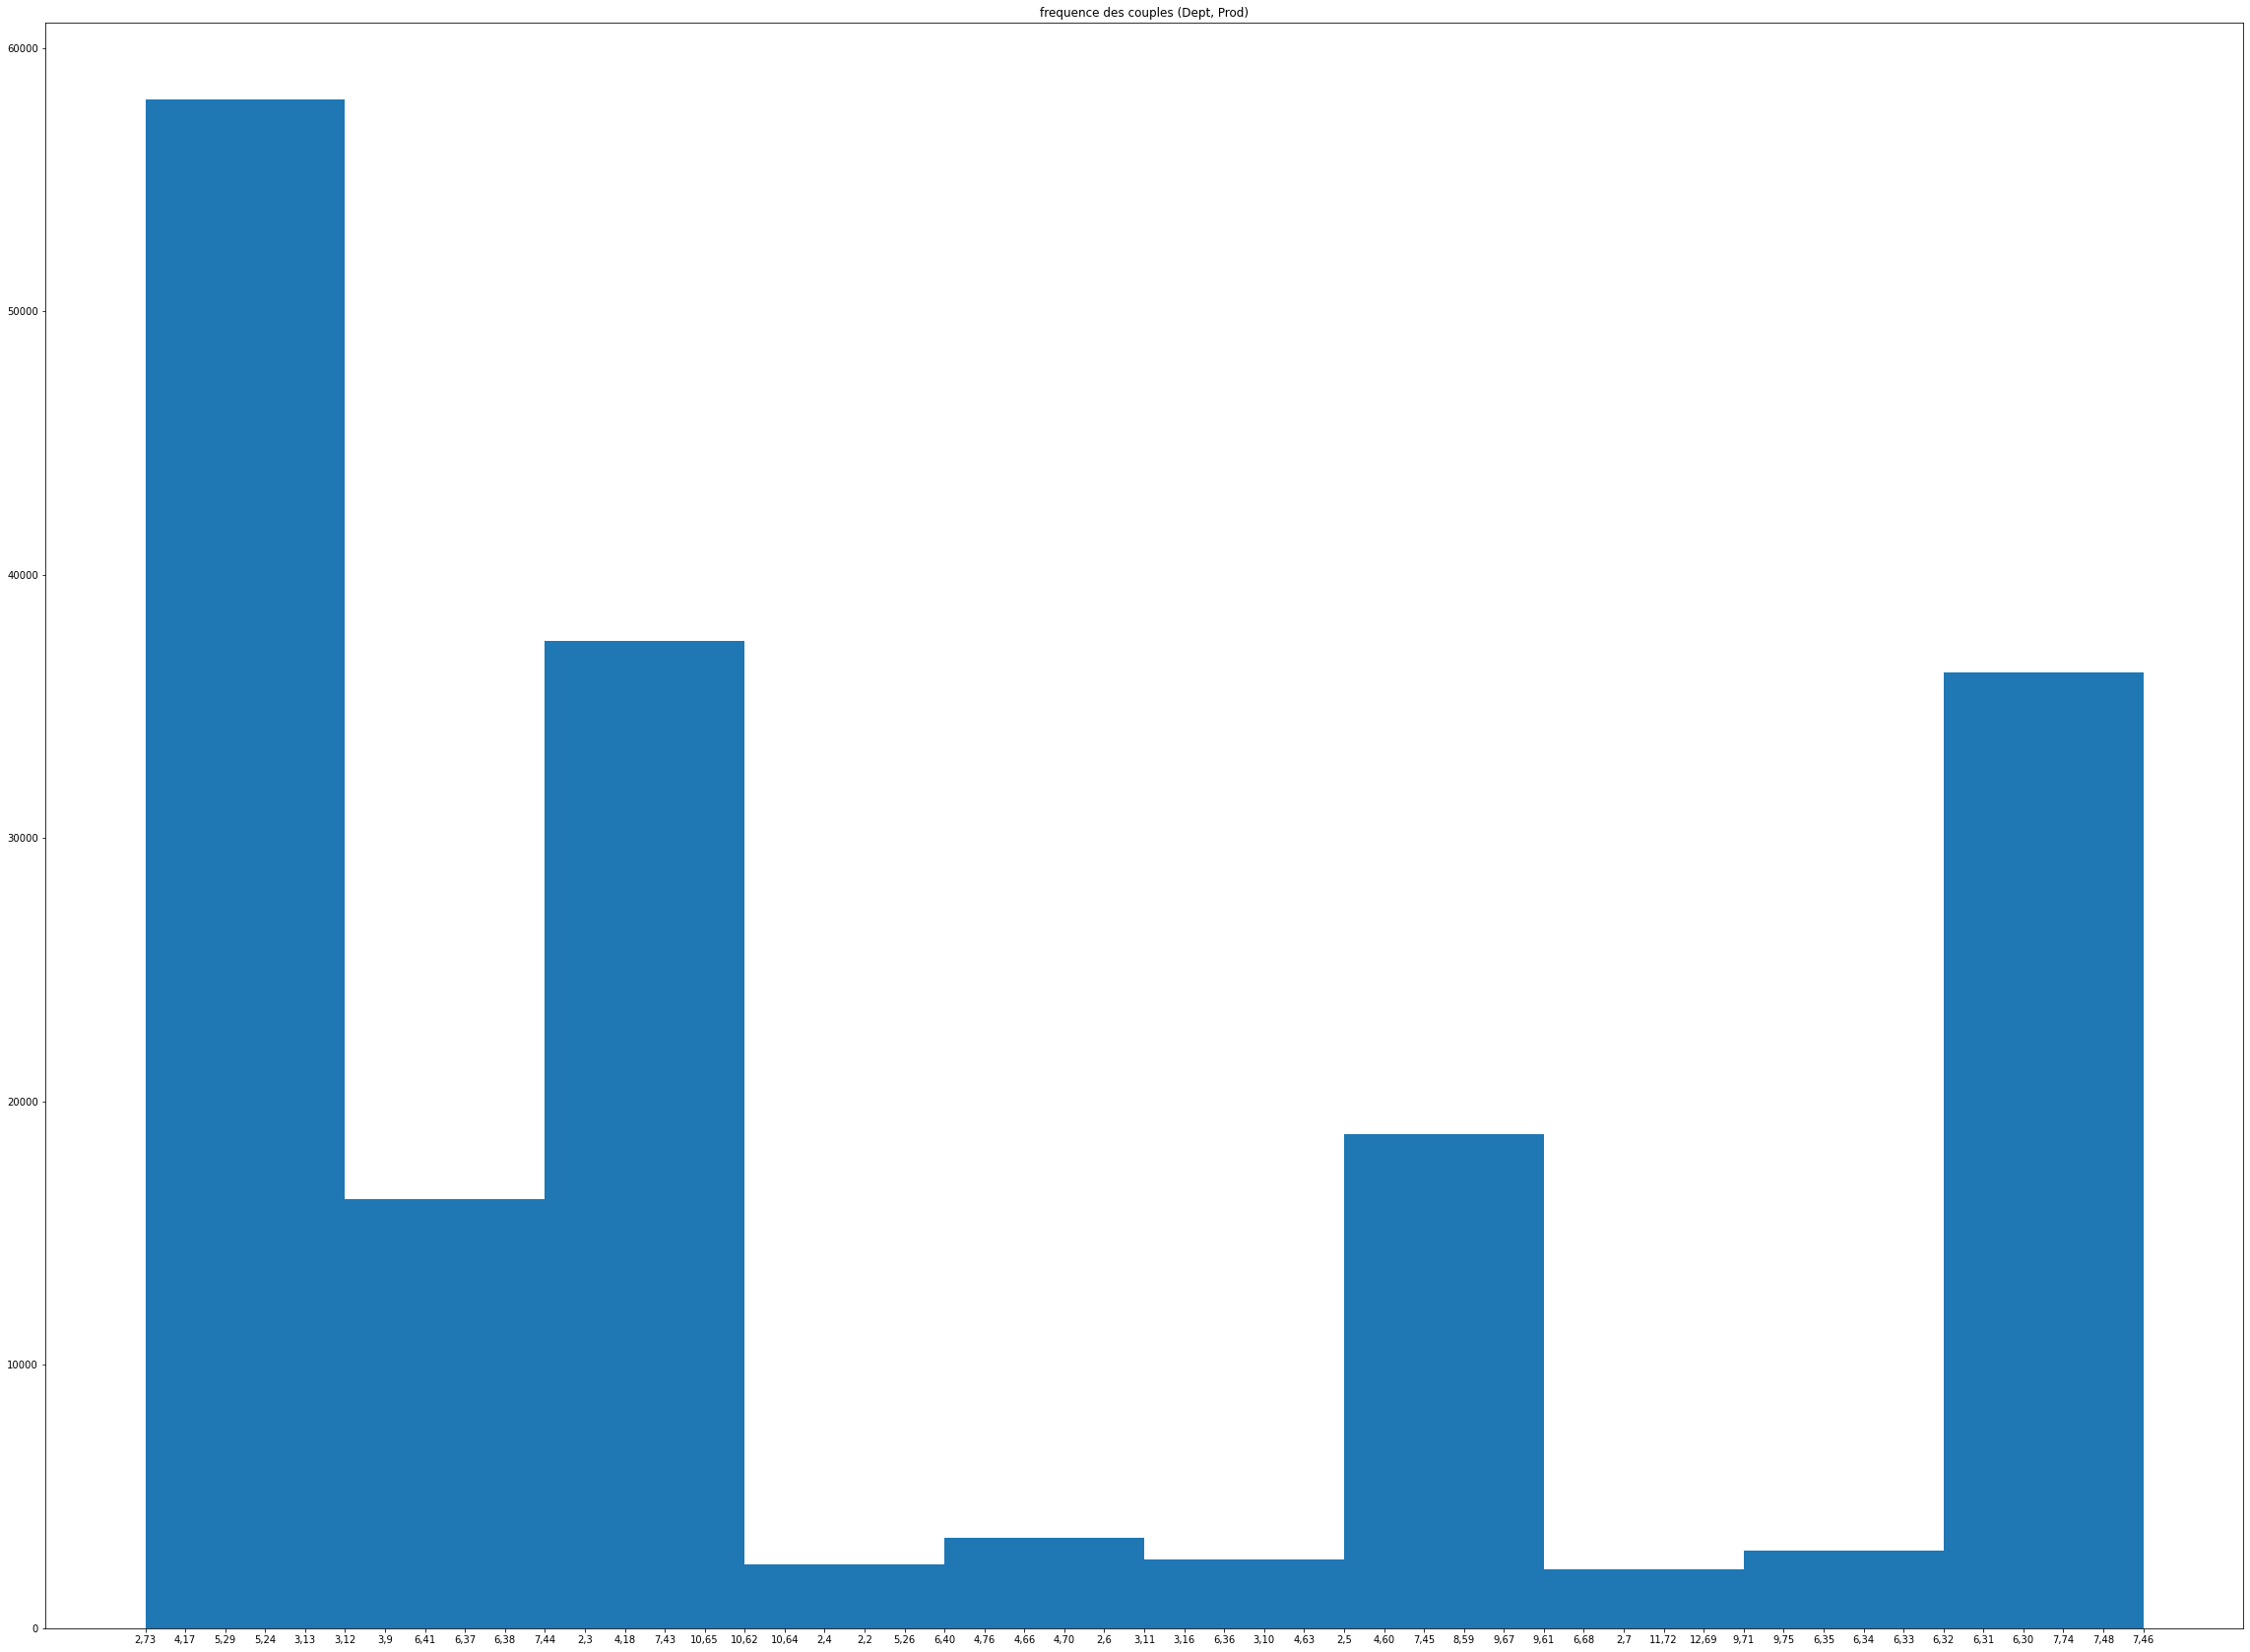

In [9]:
data_pairplot = chain[colonnes_numeriques]
pair_hist_data =  [str(dept)+ ','+str(cat) for (dept, cat) in zip(data_pairplot['Department Id'], data_pairplot['Product Category Id'])]

plt.figure(figsize=(40, 30))
plt.hist(pair_hist_data)
plt.title(f'frequence des couples (Dept, Prod)')
plt.show()

In [5]:
data_pairplot = chain[colonnes_numeriques]
data_pairplot.head()

Category Id  Customer Id  Department Id  Order Customer Id  Order Id  \
0           73        20755              2              20755     77202   
1           73        19492              2              19492     75939   
2           73        19491              2              19491     75938   
3           73        19490              2              19490     75937   
4           73        19489              2              19489     75936   

   Order Item Id  Order Item Product Price  Order Item Quantity  \
0         180517                    327.75                    1   
1         179254                    327.75                    1   
2         179253                    327.75                    1   
3         179252                    327.75                    1   
4         179251                    327.75                    1   

   Product Card Id  Product Category Id  
0             1360                   73  
1             1360                   73  
2             1360                   73  
3             1360                   73  
4             1360                   73

In [8]:
figure = plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data_pairplot, x='Customer Id', palette='viridis')
scatter.set(xlabel='cust Id', ylabel='Order Id')
plt.title(f'Scatter plot de')
plt.show()

ValueError: If using all scalar values, you must pass an index

<Figure size 576x432 with 0 Axes>

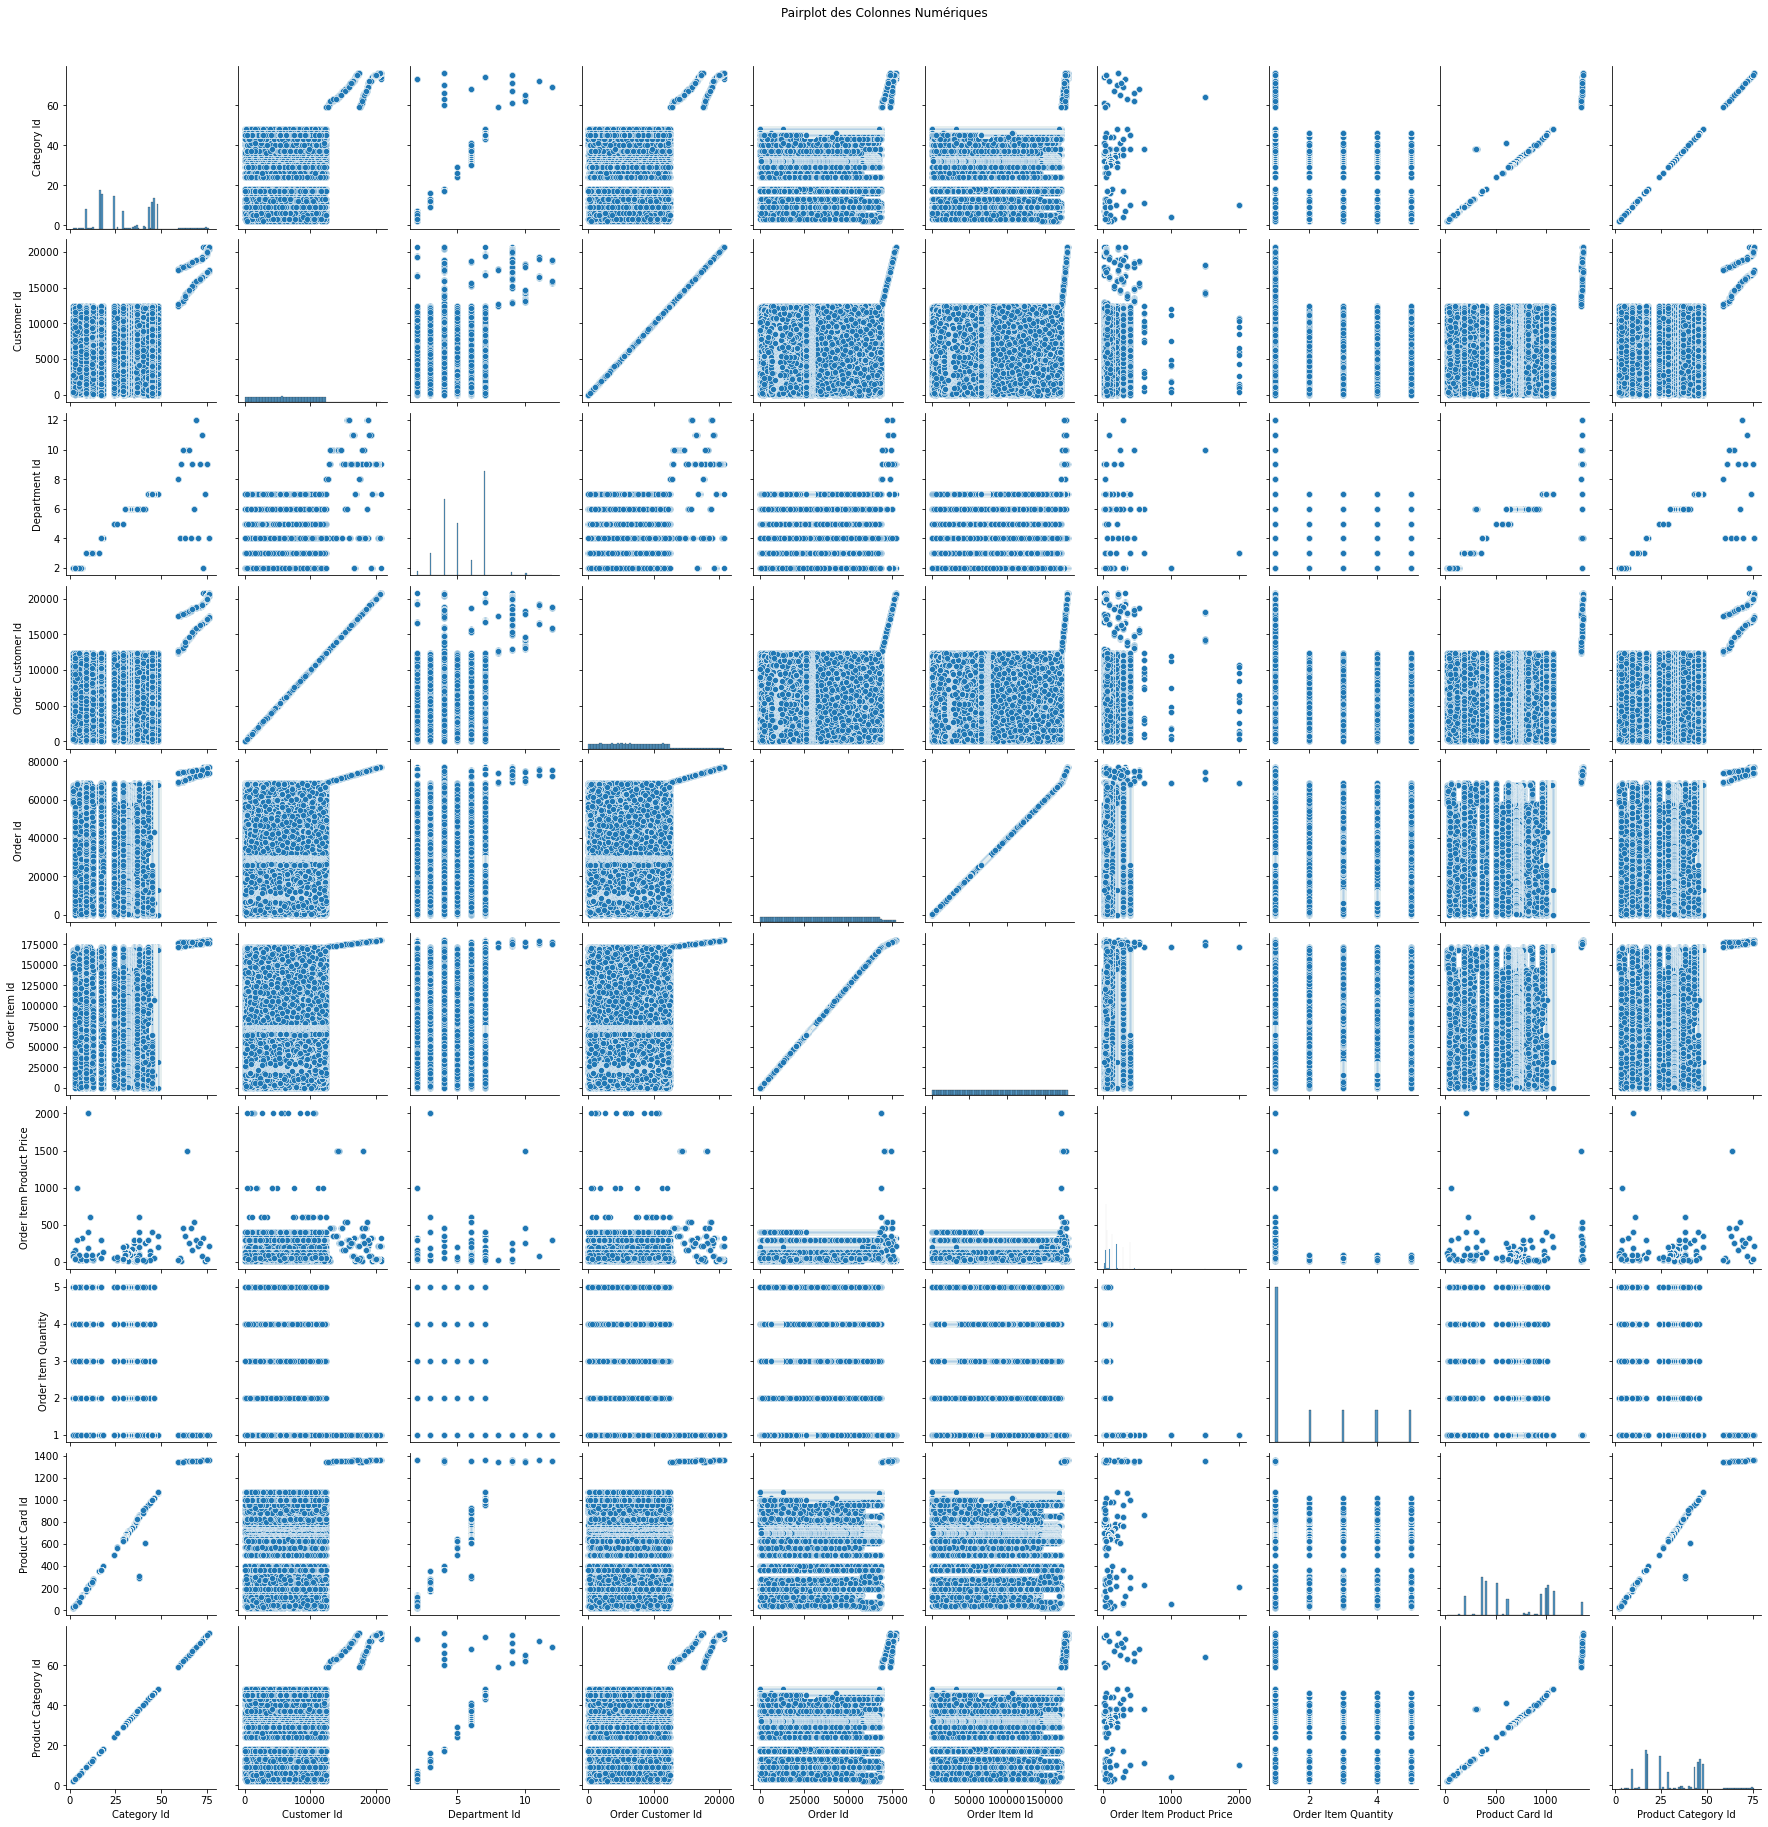

In [4]:
data_pairplot = chain[colonnes_numeriques]

# Afficher le pairplot
sns.pairplot(data_pairplot)
plt.suptitle("Pairplot des Colonnes Numériques", y=1.02)
plt.show()

In [5]:

# Vérifier s'il y a au moins une colonne numérique
if not colonnes_numeriques:
    print("Aucune colonne numérique n'a été trouvée.")
else:
    data_clustering = chain[colonnes_numeriques]

    # Nettoyage des données (si nécessaire)

    # Gérer les valeurs manquantes (exemple : remplacer par la moyenne)
    data_clustering = data_clustering.fillna(data_clustering.mean())

    # Normaliser les données
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data_clustering)

    # Appliquer le clustering (K-Means)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 lignes x 3 colonnes, ajustez en fonction de votre nombre de k

    for k in range(3, 9):  # Ajustez la plage en fonction de vos besoins
        kmeans = KMeans(n_clusters=k, random_state=42)
        chain['Cluster'] = kmeans.fit_predict(data_normalized)

        # Sélectionner les axes pour le sous-graphique actuel
        ax = axes[(k-3)//3, (k-3)%3]

        # Tracer le scatter plot sur le sous-graphique
        sns.scatterplot(x='Department Id', y='Order Id', hue='Cluster', data=chain, palette='viridis', ax=ax)
        ax.set_title(f'Résultats du Clustering (K-Means, k={k})')

    # Ajuster la disposition des sous-graphiques
    plt.tight_layout()
    plt.show()

In [ ]:
chain[['order date (DateOrders)', 'shipping date (DateOrders)']]

order date (DateOrders) shipping date (DateOrders)
0              1/31/2018 22:56             2/3/2018 22:56
1              1/13/2018 12:27            1/18/2018 12:27
2              1/13/2018 12:06            1/17/2018 12:06
3              1/13/2018 11:45            1/16/2018 11:45
4              1/13/2018 11:24            1/15/2018 11:24
...                        ...                        ...
180514          1/16/2016 3:40             1/20/2016 3:40
180515          1/16/2016 1:34             1/19/2016 1:34
180516         1/15/2016 21:00            1/20/2016 21:00
180517         1/15/2016 20:18            1/18/2016 20:18
180518         1/15/2016 18:54            1/19/2016 18:54

[180519 rows x 2 columns]

## Clustering S3

In [10]:
s3 = pd.read_excel('data/Supply chain logisitcs problem.xlsx', sheet_name='OrderList')
s3.head()

Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09           3188   87.94  
2    PLANT16           PORT09           2331   61.20  
3    PLANT16           PORT09            847   16.16  
4    PLANT16           PORT09           2163   52.34

### pairplot

In [11]:
# Sélectionner automatiquement les colonnes numériques pour le clustering
colonnes_numeriques = []

for colonne in s3.columns:
    try:
        # Essayer de convertir le premier élément en nombre
        pd.to_numeric(s3[colonne].iloc[0])
       # if colonne not in ['Order Zipcode', 'Product Description']:
        colonnes_numeriques.append(colonne)
    except (ValueError, TypeError):
        # La conversion a échoué, la colonne ne contient probablement pas de valeurs numériques
        pass

colonnes_numeriques

['Order ID',
 'TPT',
 'Ship ahead day count',
 'Ship Late Day count',
 'Product ID',
 'Unit quantity',
 'Weight']

In [37]:
s3.nunique()

Order ID                9215
Order Date                 1
Origin Port                3
Carrier                    3
TPT                        5
Service Level              3
Ship ahead day count       5
Ship Late Day count        4
Customer                  46
Product ID               772
Plant Code                 7
Destination Port           1
Unit quantity           2624
Weight                  5899
dtype: int64

In [16]:
data_pairplot = s3[colonnes_numeriques]
pair_hist_data =  pd.DataFrame ([str(dept)+ ','+str(cat) for (dept, cat) in zip(data_pairplot['Order ID'], data_pairplot['Product ID'])])


In [39]:
pair_hist_data.nunique()[0]

9215

In [27]:
pair_hist_data.columns

RangeIndex(start=0, stop=1, step=1)

In [13]:
pair_hist_data.

plt.figure(figsize=(40, 30))
plt.hist(pair_hist_data)
plt.title(f'frequence des couples (Dept, Prod)')
plt.show()

KeyboardInterrupt: 

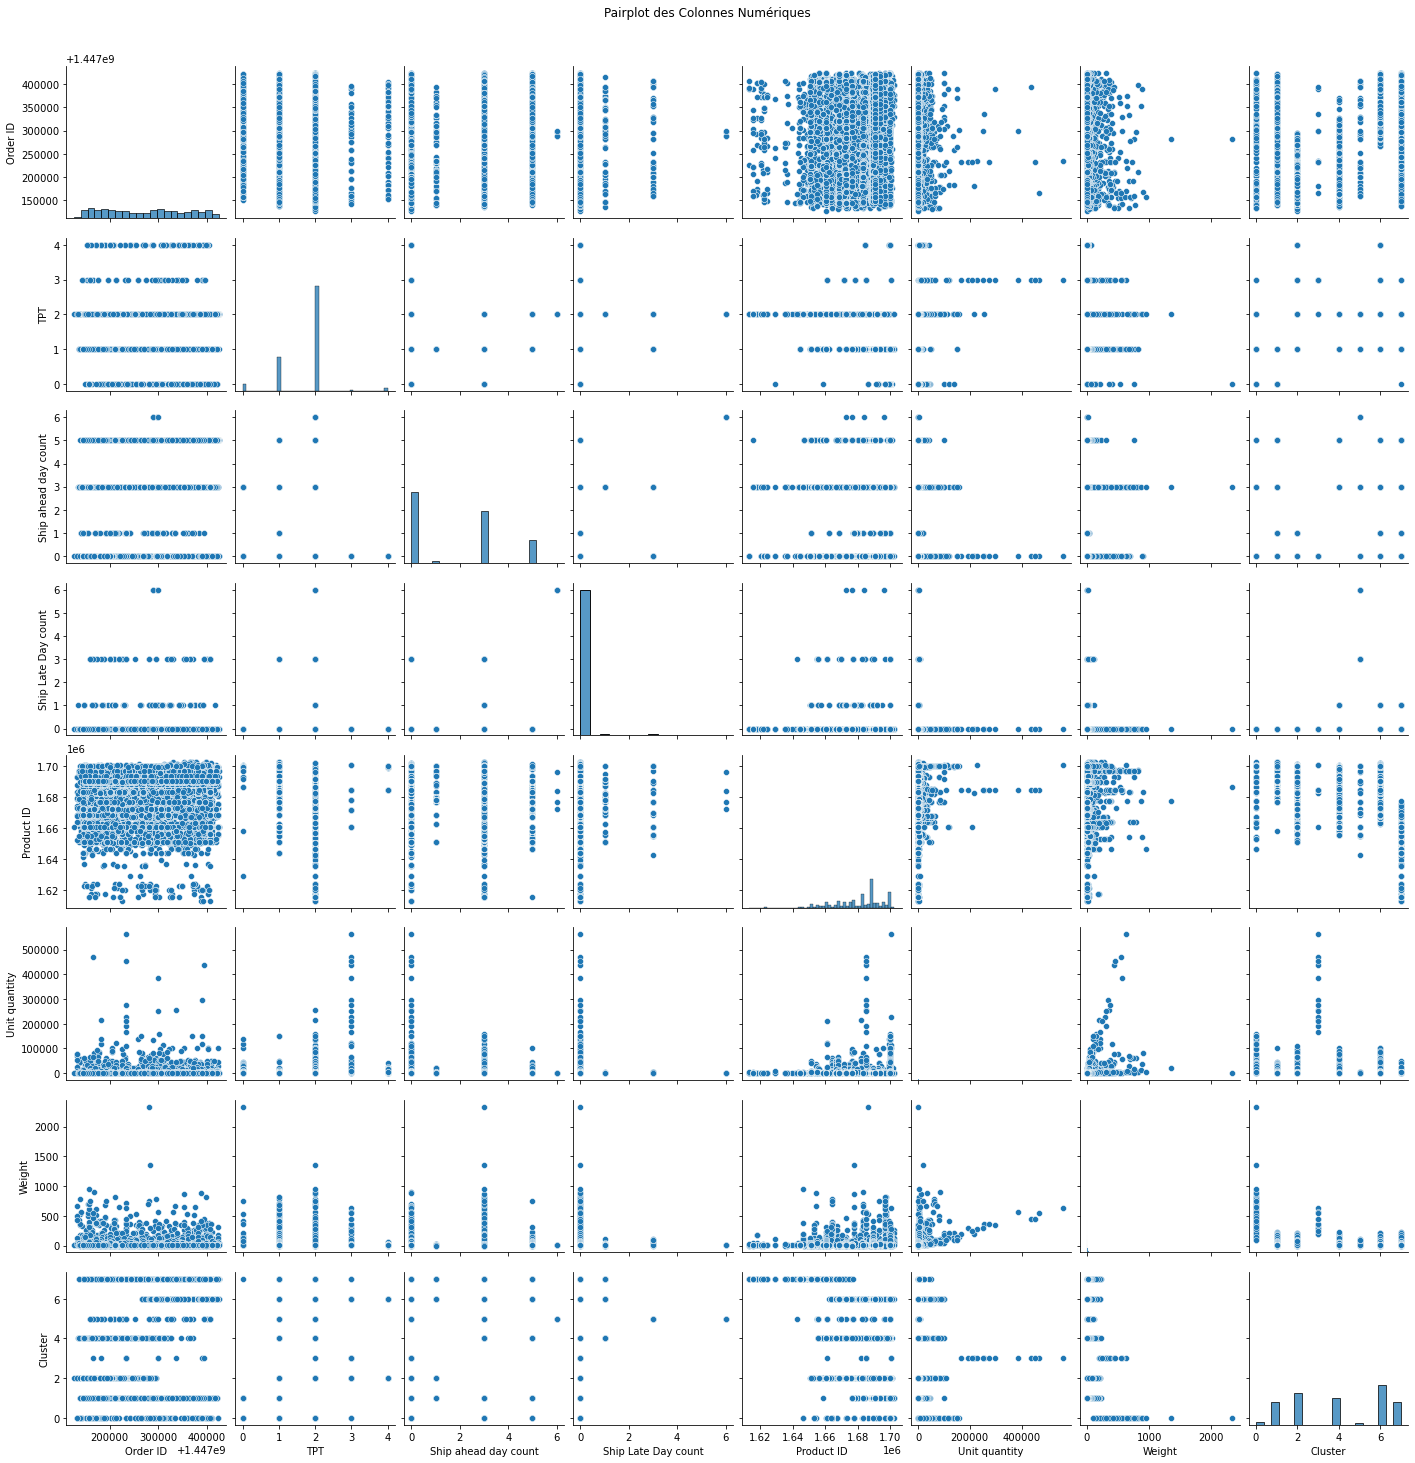

In [ ]:
# Afficher le pairplot

data_pairplot = s3[colonnes_numeriques]
sns.pairplot(data_pairplot)
plt.suptitle("Pairplot des Colonnes Numériques", y=1.02)
plt.show()

### agglomerative

<ipython-input-66-91e58e627173>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pairplot['Cluster'] = clusters


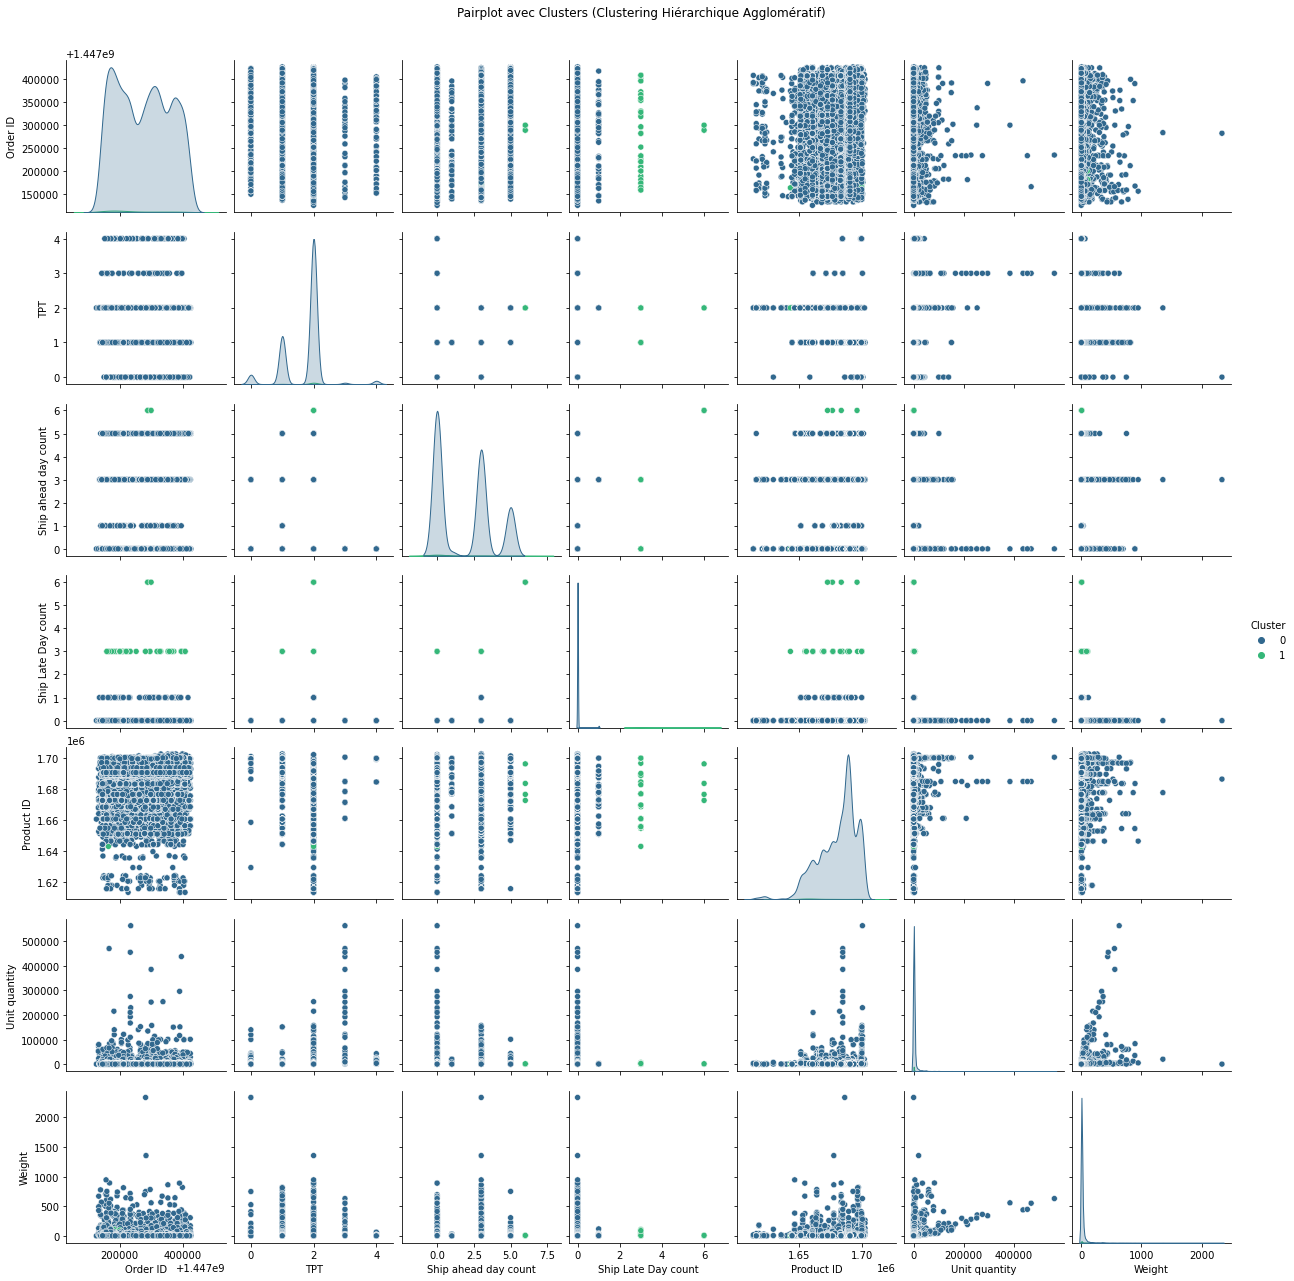

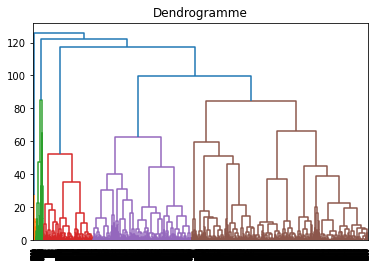

In [ ]:
nombre_clusters = 2  # Modifiez en fonction de votre cas
agglomerative_clustering = AgglomerativeClustering(n_clusters=nombre_clusters)
clusters = agglomerative_clustering.fit_predict(data_normalized)

# Ajouter la colonne des clusters à votre DataFrame
data_pairplot['Cluster'] = clusters

# Afficher le pairplot avec les clusters colorés
sns.pairplot(data_pairplot, hue='Cluster', palette='viridis')
plt.suptitle("Pairplot avec Clusters (Clustering Hiérarchique Agglomératif)", y=1.02)
plt.show()

# Afficher la matrice de liaison
linkage_matrix = linkage(data_normalized, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogramme")
plt.show()

<ipython-input-65-b9b718709512>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pairplot['Cluster'] = clusters
/Users/Roberto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


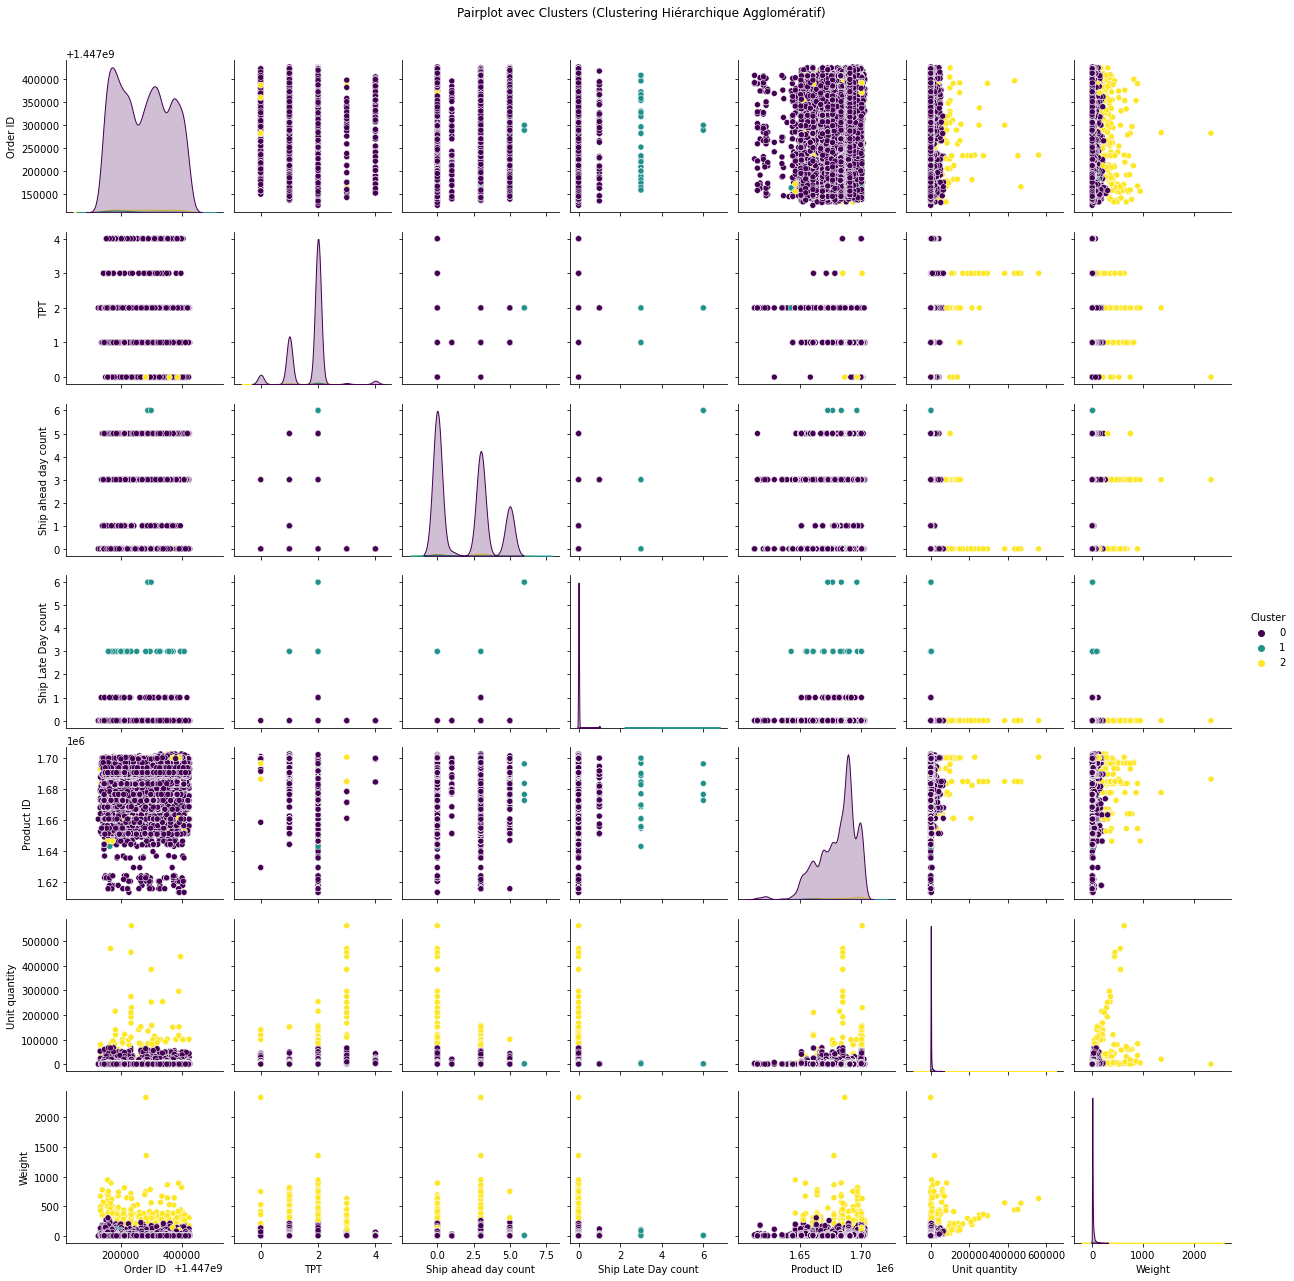

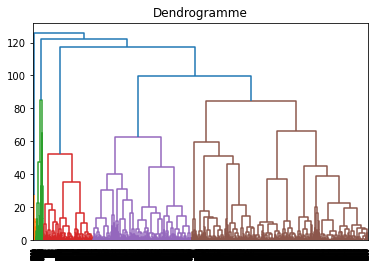

In [ ]:
# Appliquer le clustering hiérarchique agglomératif
nombre_clusters = 3  # Modifiez en fonction de votre cas
agglomerative_clustering = AgglomerativeClustering(n_clusters=nombre_clusters)
clusters = agglomerative_clustering.fit_predict(data_normalized)

# Ajouter la colonne des clusters à votre DataFrame
data_pairplot['Cluster'] = clusters

# Afficher le pairplot avec les clusters colorés
sns.pairplot(data_pairplot, hue='Cluster', palette='viridis')
plt.suptitle("Pairplot avec Clusters (Clustering Hiérarchique Agglomératif)", y=1.02)
plt.show()

# Afficher la matrice de liaison
linkage_matrix = linkage(data_normalized, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogramme")
plt.show()


### K means

/Users/Roberto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


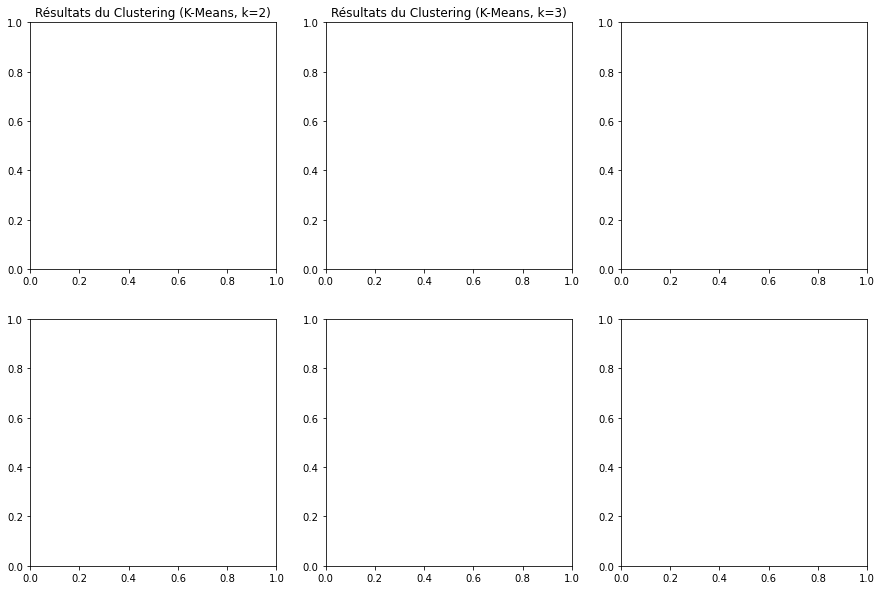

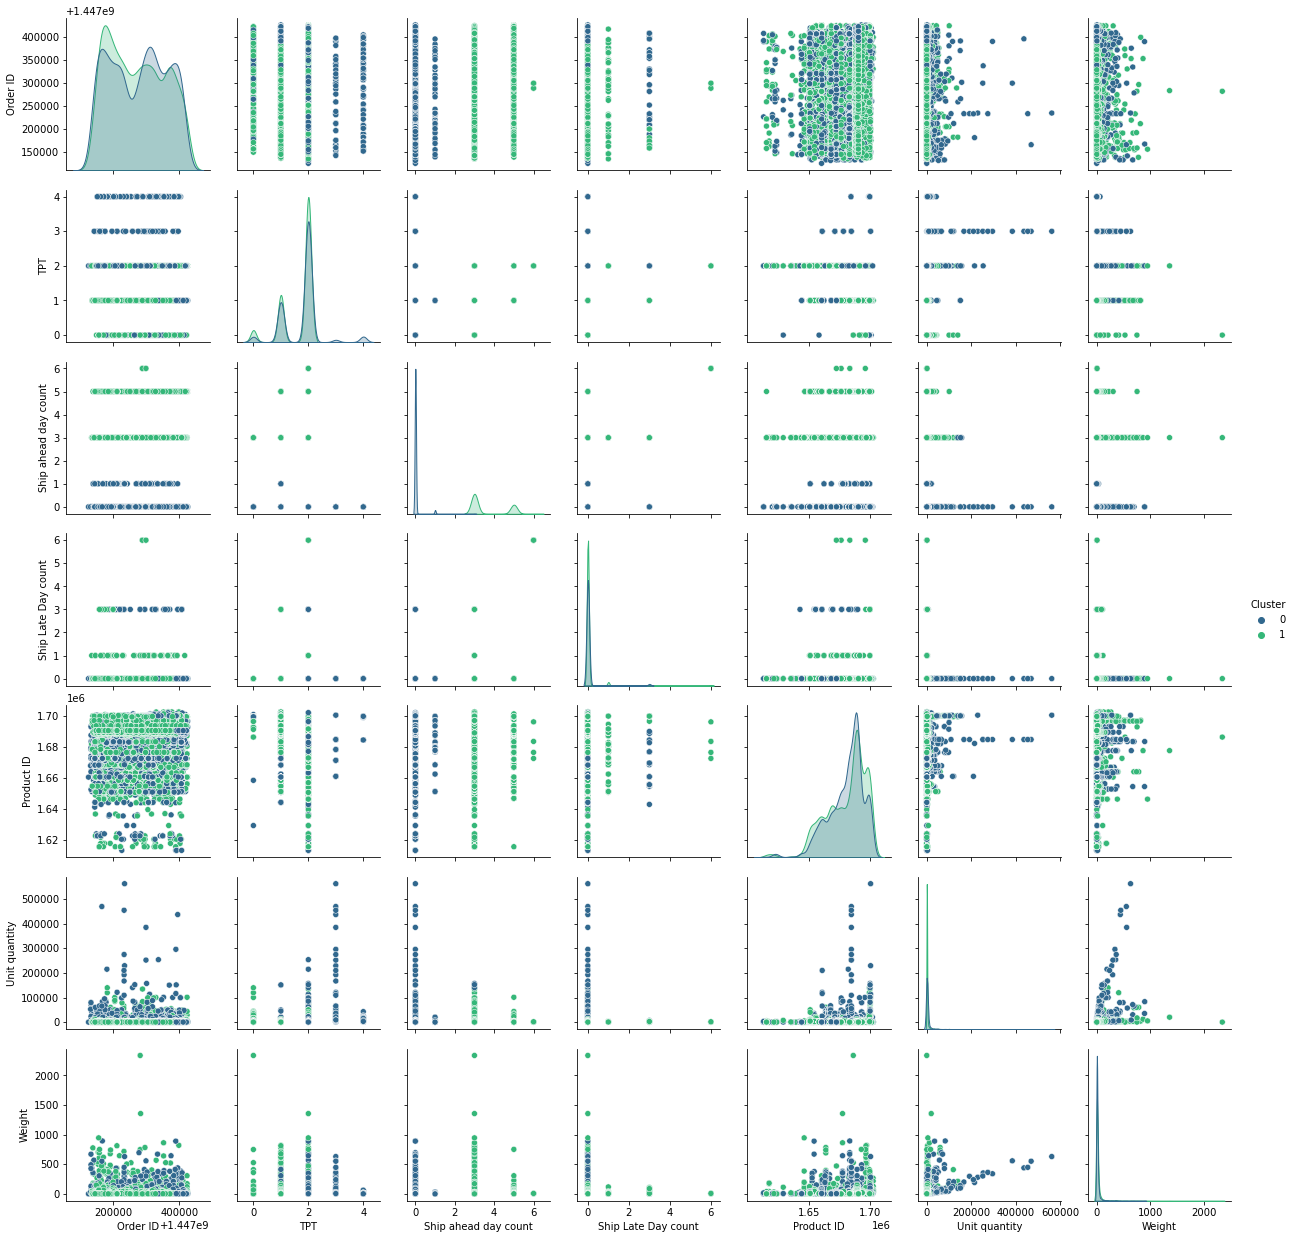

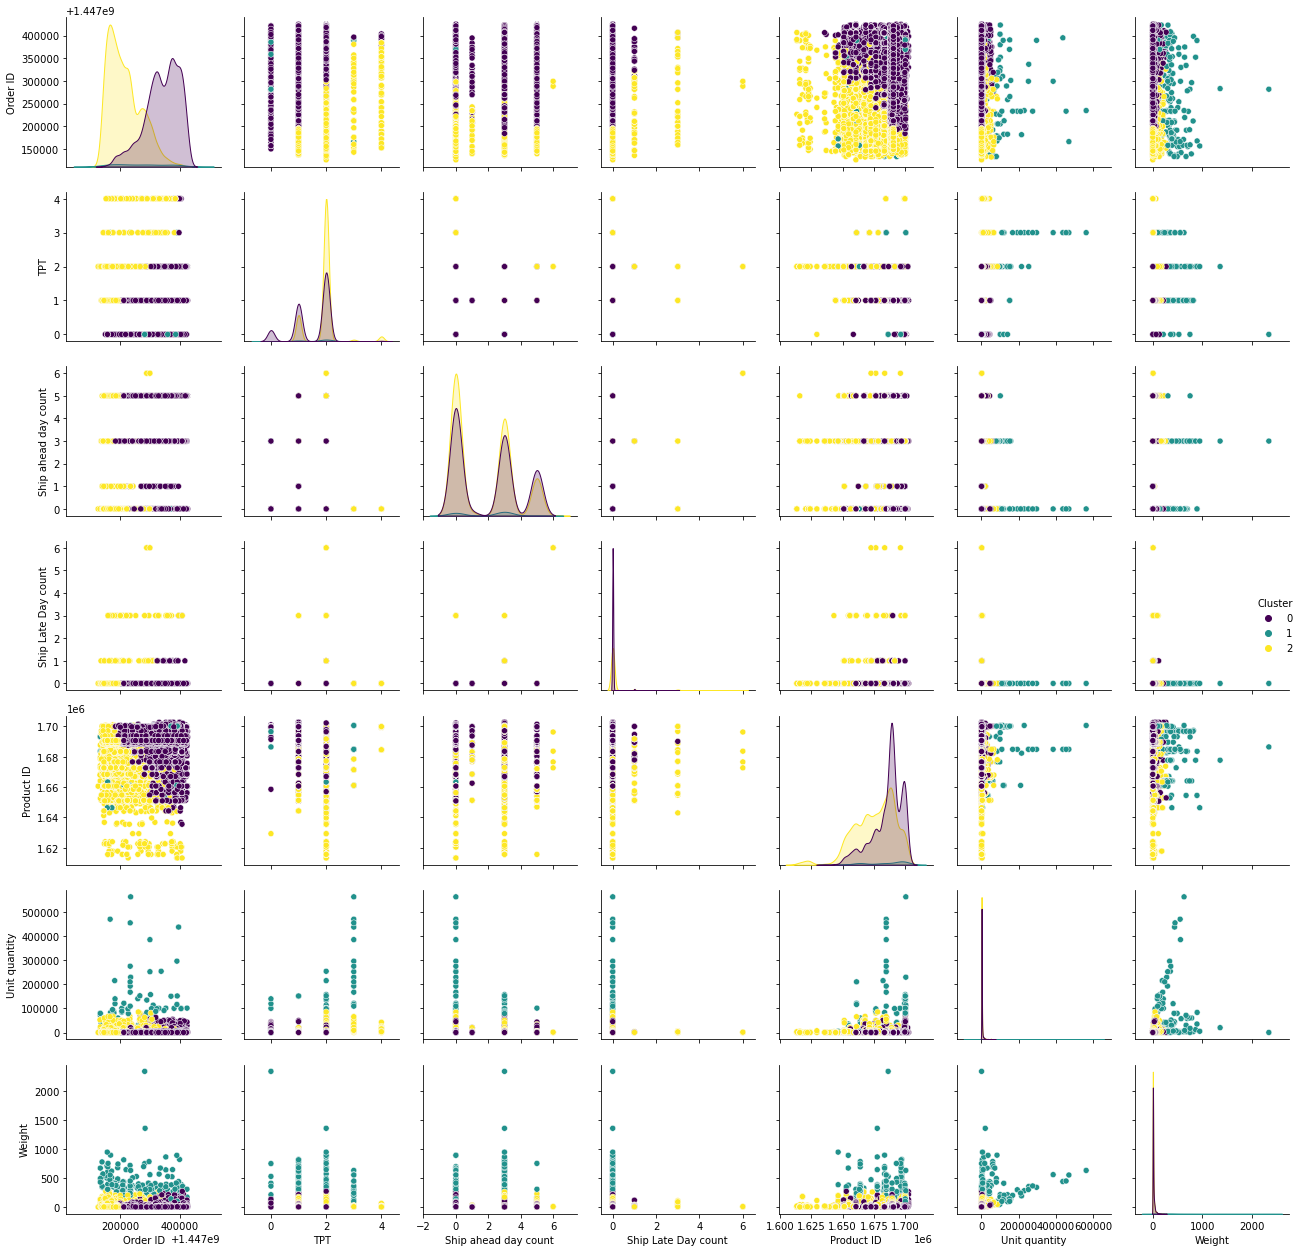

In [ ]:

# Vérifier s'il y a au moins une colonne numérique
if not colonnes_numeriques:
    print("Aucune colonne numérique n'a été trouvée.")
else:
    data_clustering = s3[colonnes_numeriques]

    # Nettoyage des données (si nécessaire)

    # Gérer les valeurs manquantes (exemple : remplacer par la moyenne)
    data_clustering = data_clustering.fillna(data_clustering.mean())

    # Normaliser les données
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data_clustering)

    # Appliquer le clustering (K-Means)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 lignes x 3 colonnes, ajustez en fonction de votre nombre de k

    for k in range(2, 4):  # Ajustez la plage en fonction de vos besoins
        kmeans = KMeans(n_clusters=k, random_state=42)
        data_clustering['Cluster'] = kmeans.fit_predict(data_normalized)

        # Sélectionner les axes pour le sous-graphique actuel
        ax = axes[(k-2)//2, (k-2)%2]

        # Tracer le scatter plot sur le sous-graphique
       # sns.scatterplot(x='Product ID', y='Order ID', hue='Cluster', data=s3, palette='viridis', ax=ax)
        sns.pairplot(data_clustering, hue='Cluster', palette='viridis')
        ax.set_title(f'Résultats du Clustering (K-Means, k={k})')

    # Ajuster la disposition des sous-graphiques
    plt.tight_layout()
    plt.show()

## Other things

In [ ]:
for col in chain.columns:
    print(col, type(chain[col][0]))

Type <class 'str'>
Days for shipping (real) <class 'numpy.int64'>
Days for shipment (scheduled) <class 'numpy.int64'>
Benefit per order <class 'numpy.float64'>
Sales per customer <class 'numpy.float64'>
Delivery Status <class 'str'>
Late_delivery_risk <class 'numpy.int64'>
Category Id <class 'numpy.int64'>
Category Name <class 'str'>
Customer City <class 'str'>
Customer Country <class 'str'>
Customer Email <class 'str'>
Customer Fname <class 'str'>
Customer Id <class 'numpy.int64'>
Customer Lname <class 'str'>
Customer Password <class 'str'>
Customer Segment <class 'str'>
Customer State <class 'str'>
Customer Street <class 'str'>
Customer Zipcode <class 'numpy.float64'>
Department Id <class 'numpy.int64'>
Department Name <class 'str'>
Latitude <class 'numpy.float64'>
Longitude <class 'numpy.float64'>
Market <class 'str'>
Order City <class 'str'>
Order Country <class 'str'>
Order Customer Id <class 'numpy.int64'>
order date (DateOrders) <class 'str'>
Order Id <class 'numpy.int64'>
Order

In [ ]:
oder_list = pd.read_excel('data/Supply chain logisitcs problem.xlsx', sheet_name='OrderList')
oder_list.head()
col_oder = oder_list.columns

In [ ]:
col_oder

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')

In [ ]:


# Vous pouvez maintenant accéder à chaque DataFrame par le nom de la feuille
for sheet_name, sheet_data in oder_list.items():
    print(f"Feuille: {sheet_name}")
    print(sheet_data.head())


# lien direct : same column name

# connaissant la ville pour un port
# une fonction qui calcule ville(zipcode) en fonction de destination port
# attrib_source_b = f(attrib_source_a) : pour creer un lien
# un outils integration qui genere les liens entre les differentes sources

Feuille: OrderList
       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09

In [ ]:
results_data = []
results_df = pd.DataFrame()
df = oder_list
for column in ["Weight", "Unit quantity"]:
    result_texts = []
    result_texts.append(("Valeur la plus fréquente", df[column].mode().iloc[0]))
    result_texts.append(("Valeurs distinctes", f"{', '.join(map(str, df[column].unique()))}"))
    result_texts.append(("Missing", df[column].isnull().mean() * 100))
    if pd.api.types.is_numeric_dtype(df[column]) and np.issubdtype(df[column].dtype, np.number):
        result_texts.append(("min", df[column].min()))
        result_texts.append(("mean", df[column].mean()))
        result_texts.append(("max", df[column].max()))
        result_texts.append(("std", df[column].std()))
    results_data.append([column, result_texts])

In [ ]:
results_data[0]

['Weight',
 [('Valeur la plus fréquente', 4.40449246755705),
  ('Valeurs distinctes',
   '14.3, 87.94, 61.2, 16.16, 52.34, 92.8, 46.9, 2.86, 26.6, 62.2, 75.5, 73.9, 7.800000000000001, 59.5, 52.7, 58.5, 181.7, 227.2, 74.1, 80.43000000000002, 265.1, 267.1, 271.1, 112.6, 61.8, 107.88, 216.57, 27.81, 32.9, 13.36, 106.88, 129.14, 74.25, 171.22, 6.18, 77.25, 27.9, 15.45, 43.17, 16.45, 33.9, 24.72, 60.8, 19.54, 43.26, 9.27, 46.35, 65.8, 101.7, 66.8, 84.7, 78.34, 89.7, 83.4, 50.68, 15.4, 48.2, 31.26, 16.4, 14.4, 7.7, 6.16, 42.2, 38.04, 32.8, 23.1, 1.54, 66.6, 43.2, 457.16, 245.08, 54.52, 113.04, 56.52, 820.44, 60.52, 121.04, 302.6, 144.88, 368.12, 498.67999999999995, 384.12, 337.12, 136.88, 37.68, 525.68, 369.12, 644.24, 164.56, 717.24, 345.12, 184.56, 777.24, 434.64, 257.76, 148.88, 335.12, 195.56, 344.12, 346.12, 134.88, 540.68, 567.68, 484.67999999999995, 521.68, 83.36, 813.28, 331.12, 504.67999999999995, 333.12, 341.12, 508.67999999999995, 348.12, 404.8, 353.12, 417.92, 308.36, 524.1600000

In [ ]:
type(oder_list['Order ID'][0])

numpy.float64

In [ ]:
data = pd.DataFrame(results_data, columns=['Colonne', 'Résultat'])

In [ ]:

for rs in data['Résultat']:
    for r in rs:
        print(r)

0


In [ ]:
for r in result_texts:
    print(r)

('Valeur la plus fréquente', 4.40449246755705)
('Valeurs distinctes', '14.3, 87.94, 61.2, 16.16, 52.34, 92.8, 46.9, 2.86, 26.6, 62.2, 75.5, 73.9, 7.800000000000001, 59.5, 52.7, 58.5, 181.7, 227.2, 74.1, 80.43000000000002, 265.1, 267.1, 271.1, 112.6, 61.8, 107.88, 216.57, 27.81, 32.9, 13.36, 106.88, 129.14, 74.25, 171.22, 6.18, 77.25, 27.9, 15.45, 43.17, 16.45, 33.9, 24.72, 60.8, 19.54, 43.26, 9.27, 46.35, 65.8, 101.7, 66.8, 84.7, 78.34, 89.7, 83.4, 50.68, 15.4, 48.2, 31.26, 16.4, 14.4, 7.7, 6.16, 42.2, 38.04, 32.8, 23.1, 1.54, 66.6, 43.2, 457.16, 245.08, 54.52, 113.04, 56.52, 820.44, 60.52, 121.04, 302.6, 144.88, 368.12, 498.67999999999995, 384.12, 337.12, 136.88, 37.68, 525.68, 369.12, 644.24, 164.56, 717.24, 345.12, 184.56, 777.24, 434.64, 257.76, 148.88, 335.12, 195.56, 344.12, 346.12, 134.88, 540.68, 567.68, 484.67999999999995, 521.68, 83.36, 813.28, 331.12, 504.67999999999995, 333.12, 341.12, 508.67999999999995, 348.12, 404.8, 353.12, 417.92, 308.36, 524.1600000000001, 397.6, 132.

In [ ]:
pays_s1 = chain['Order Country'].unique()
pays_s2 = estat['geo'].unique()

for pays in pays_s2:
    if pays in pays_s1:
        print(pays)

In [ ]:
chain['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [ ]:
estat = pd.read_csv('data/estat_isoc_eb_ics_en.csv')
estat.head()

DATAFLOW        LAST UPDATE freq size_emp       nace_r2  \
0  ESTAT:ISOC_EB_ICS(1.0)  08/12/23 11:00:00    A      0-9  C10-S951_X_K   
1  ESTAT:ISOC_EB_ICS(1.0)  08/12/23 11:00:00    A      0-9  C10-S951_X_K   
2  ESTAT:ISOC_EB_ICS(1.0)  08/12/23 11:00:00    A      0-9  C10-S951_X_K   
3  ESTAT:ISOC_EB_ICS(1.0)  08/12/23 11:00:00    A      0-9  C10-S951_X_K   
4  ESTAT:ISOC_EB_ICS(1.0)  08/12/23 11:00:00    A      0-9  C10-S951_X_K   

         indic_is    unit geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
0   E_DI3_HI_SISC  PC_ENT  ES         2023        2.0      NaN  
1   E_DI3_HI_SISC  PC_ENT  PT         2023        2.2      NaN  
2   E_DI3_LO_SISC  PC_ENT  ES         2023        4.1      NaN  
3   E_DI3_LO_SISC  PC_ENT  PT         2023        4.1      NaN  
4  E_DI3_VHI_SISC  PC_ENT  ES         2023        0.3      NaN

In [ ]:
estat.corr()

<ipython-input-4-78080b977f45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  estat.corr()


TIME_PERIOD  OBS_VALUE
TIME_PERIOD     1.000000  -0.080715
OBS_VALUE      -0.080715   1.000000

In [ ]:
col = estat.columns
col = col.insert(0, 'all')
print(col)

Index(['all', 'DATAFLOW', 'LAST UPDATE', 'freq', 'size_emp', 'nace_r2',
       'indic_is', 'unit', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')


In [ ]:
a = estat['unit'].dtype

In [ ]:
s1 = pd.read_csv('data/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
s1.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

In [ ]:
s1.corr()

<ipython-input-3-cfcfc7b07517>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s1.corr()


Days for shipping (real)  \
Days for shipping (real)                       1.000000   
Days for shipment (scheduled)                  0.515880   
Benefit per order                             -0.005101   
Sales per customer                             0.001757   
Late_delivery_risk                             0.401415   
Category Id                                   -0.000348   
Customer Id                                    0.003432   
Customer Zipcode                               0.000112   
Department Id                                 -0.001631   
Latitude                                      -0.004073   
Longitude                                      0.003911   
Order Customer Id                              0.003432   
Order Id                                      -0.001711   
Order Item Cardprod Id                        -0.000859   
Order Item Discount                            0.002231   
Order Item Discount Rate                       0.001467   
Order Item Id                                 -0.001769   
Order Item Product Price                       0.002185   
Order Item Profit Ratio                       -0.004638   
Order Item Quantity                           -0.000811   
Sales                                          0.001962   
Order Item Total                               0.001757   
Order Profit Per Order                        -0.005101   
Order Zipcode                                 -0.000811   
Product Card Id                               -0.000859   
Product Category Id                           -0.000348   
Product Description                                 NaN   
Product Price                                  0.002185   
Product Status                                      NaN   

                               Days for shipment (scheduled)  \
Days for shipping (real)                            0.515880   
Days for shipment (scheduled)                       1.000000   
Benefit per order                                  -0.000185   
Sales per customer                                  0.006445   
Late_delivery_risk                                 -0.369352   
Category Id                                        -0.000367   
Customer Id                                         0.000899   
Customer Zipcode                                   -0.003019   
Department Id                                      -0.000262   
Latitude                                           -0.005300   
Longitude                                           0.003675   
Order Customer Id                                   0.000899   
Order Id                                           -0.001878   
Order Item Cardprod Id                             -0.000431   
Order Item Discount                                 0.002897   
Order Item Discount Rate                            0.000065   
Order Item Id                                      -0.001848   
Order Item Product Price                            0.006912   
Order Item Profit Ratio                            -0.001822   
Order Item Quantity                                -0.002925   
Sales                                               0.006327   
Order Item Total                                    0.006445   
Order Profit Per Order                             -0.000185   
Order Zipcode                                       0.005249   
Product Card Id                                    -0.000431   
Product Category Id                                -0.000367   
Product Description                                      NaN   
Product Price                                       0.006912   
Product Status                                           NaN   

                               Benefit per order  Sales per customer  \
Days for shipping (real)               -0.005101            0.001757   
Days for shipment (scheduled)          -0.000185            0.006445   
Benefit per order                       1.000000            0.133484   
Sales per customer                      0.133484   

In [ ]:
numeric_columns = s1.select_dtypes(include=np.number)
numeric_columns = numeric_columns.dropna(how='all')
numeric_columns = numeric_columns.dropna(subset=numeric_columns.columns, how='all')


In [ ]:
numeric_columns[:10]

Days for shipping (real)  Days for shipment (scheduled)  Benefit per order  \
0                         3                              4          91.250000   
1                         5                              4        -249.089996   
2                         4                              4        -247.779999   
3                         3                              4          22.860001   
4                         2                              4         134.210007   
5                         6                              4          18.580000   
6                         2                              1          95.180000   
7                         2                              1          68.430000   
8                         3                              2         133.720001   
9                         2                              1         132.149994   

   Sales per customer  Late_delivery_risk  Category Id  Customer Id  \
0          314.640015                   0           73        20755   
1          311.359985                   1           73        19492   
2          309.720001                   0           73        19491   
3          304.809998                   0           73        19490   
4          298.250000                   0           73        19489   
5          294.980011                   0           73        19488   
6          288.420013                   1           73        19487   
7          285.140015                   1           73        19486   
8          278.589996                   1           73        19485   
9          275.309998                   1           73        19484   

   Customer Zipcode  Department Id   Latitude  ...  Order Item Quantity  \
0             725.0              2  18.251453  ...                    1   
1             725.0              2  18.279451  ...                    1   
2           95125.0              2  37.292233  ...                    1   
3           90027.0              2  34.125946  ...                    1   
4             725.0              2  18.253769  ...                    1   
5           14150.0              2  43.013969  ...                    1   
6             725.0              2  18.242538  ...                    1   
7           33162.0              2  25.928869  ...                    1   
8             725.0              2  18.233223  ...                    1   
9           94583.0              2  37.773991  ...                    1   

    Sales  Order Item Total  Order Profit Per Order  Order Zipcode  \
0  327.75        314.640015               91.250000            NaN   
1  327.75        311.359985             -249.089996            NaN   
2  327.75        309.720001             -247.779999            NaN   
3  327.75        304.809998               22.860001            NaN   
4  327.75        298.250000              134.210007            NaN   
5  327.75        294.980011               18.580000            NaN   
6  327.75        288.420013               95.180000            NaN   
7  327.75        285.140015               68.430000            NaN   
8  327.75        278.589996              133.720001            NaN   
9  327.75        275.309998              132.149994            NaN   

   Product Card Id  Product Category Id  Product Description  Product Price  \
0             1360                   73                  NaN         327.75   
1             1360                   73                  NaN         327.75   
2             1360                   73                  NaN         327.75   
3             1360                   73                  NaN         327.75   
4             1360                   73                  NaN         327.75   
5             1360                   73                  NaN         327.75   
6             1360                   73                  NaN         327.75   
7             1360                   73                  NaN         327.75   
8             1360   

In [ ]:
import seaborn as sns
sns.pairplot(numeric_columns[:10])

KeyboardInterrupt: 

In [ ]:
s = s1.select_dtypes(include=[np.number])
s1.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [ ]:
for k in s:
    if k not in s1:
        print(k)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named results_df
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22],
        'City': ['New York', 'San Francisco', 'Los Angeles']}
results_df = pd.DataFrame(data)

# Using iterrows to iterate over the rows
for index, row_series in results_df.iterrows():
    print(f"Index: {index}, Name: {row_series['Name']}, Age: {row_series['Age']}, City: {row_series['City']}")


Index: 0, Name: Alice, Age: 25, City: New York
Index: 1, Name: Bob, Age: 30, City: San Francisco
Index: 2, Name: Charlie, Age: 22, City: Los Angeles


In [ ]:
s1['Category Name'].values[0]

'Sporting Goods'

In [ ]:
result_texts = []
result_texts.append(("col", "nom"))
result_texts.append(("min", 1))
result_texts.append(("max", 5))


In [ ]:
results_data = []
column = "var"
results_data.append([column, result_texts])

# Mettre à jour le DataFrame des résultats
results_data = pd.DataFrame(results_data, columns=['Colonne', 'Resultats'])

In [ ]:
for result in resultats:
                        # Enclose both parameter name and value in backticks
                        parameter_name = f"`{result[0]}`"
                        parameter_value = f"`{result[1]}`"
                        effectue_query += f"a.{parameter_name} = {parameter_value}, "

In [ ]:
rss = results_data['Resultats']
for rs in rss:
    for r in rs:
        print(r)
# a.`('Valeurs distinctes', 'ESTAT:ISOC_EB_ICS(1.0)')` = `('histogramm

('col', 'nom')
('min', 1)
('max', 5)
